# Monte Carlo Simulation for Qubit to Shor's Algorithm

In [2]:
!pip install numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 7.5 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 49.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


Running simulation 1/10000...
Running simulation 2/10000...
Running simulation 3/10000...
Running simulation 4/10000...
Running simulation 5/10000...
Running simulation 6/10000...
Running simulation 7/10000...
Running simulation 8/10000...
Running simulation 9/10000...
Running simulation 10/10000...
Running simulation 11/10000...
Running simulation 12/10000...
Running simulation 13/10000...
Running simulation 14/10000...
Running simulation 15/10000...
Running simulation 16/10000...
Running simulation 17/10000...
Running simulation 18/10000...
Running simulation 19/10000...
Running simulation 20/10000...
Running simulation 21/10000...
Running simulation 22/10000...
Running simulation 23/10000...
Running simulation 24/10000...
Running simulation 25/10000...
Running simulation 26/10000...
Running simulation 27/10000...
Running simulation 28/10000...
Running simulation 29/10000...
Running simulation 30/10000...
Running simulation 31/10000...
Running simulation 32/10000...
Running simulatio

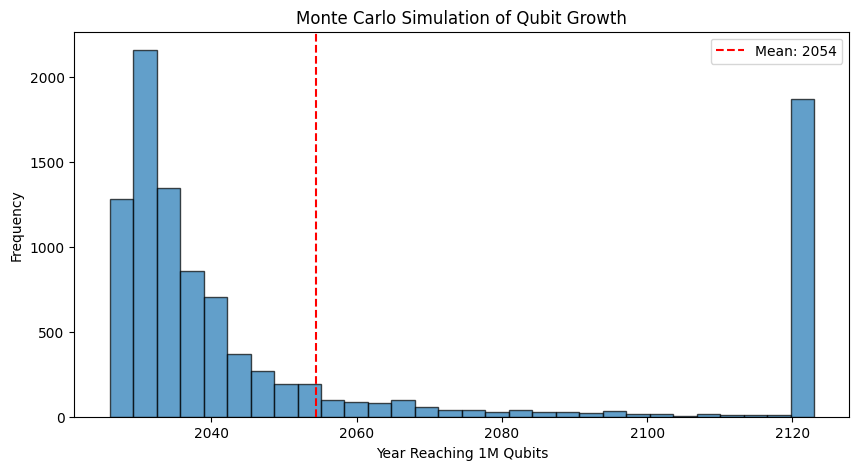

Expected year to reach 20M qubits: 2054 (±35.2 years)


In [14]:
import numpy as np
import matplotlib.pyplot as plt

years = np.array([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])
qubits = np.array([5, 49, 72, 72, 76, 127, 433, 1180])

r_estimates = np.log(qubits[1:] / qubits[:-1])  
r_mean, r_std = np.mean(r_estimates), np.std(r_estimates)

n_simulations = 10000  
target_qubits = 20_000_000 
start_year = years[-1] 
max_years = 100

predicted_years = []

for _ in range(n_simulations):
    print(f"Running simulation {_+1}/{n_simulations}...")
    r_sim = np.random.normal(r_mean, r_std) 
    qubits_sim = qubits[-1]
    year = start_year

    while qubits_sim < target_qubits and (year - start_year) < max_years:
        qubits_sim *= np.exp(r_sim) 
        year += 1

    predicted_years.append(year)

plt.figure(figsize=(10,5))
plt.hist(predicted_years, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(np.mean(predicted_years), color='red', linestyle='dashed', label=f"Mean: {np.mean(predicted_years):.0f}")
plt.xlabel("Year Reaching 1M Qubits")
plt.ylabel("Frequency")
plt.title("Monte Carlo Simulation of Qubit Growth")
plt.legend()
plt.show()

print(f"Expected year to reach 20M qubits: {np.mean(predicted_years):.0f} (±{np.std(predicted_years):.1f} years)")